# **Business objective**

The model predicts if a prospective client will purchase a car or not. This model predict the probability of a client purchasing a car using the client features such as gender, age, and annual salary. The model can support businesses to find out if their client will purchase a car or not.

# **0. Import necessary Python Packages**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import missingno as msno

%matplotlib inline

# **1. Get the data**

### **1.1 Import the Dataset**

In [2]:
# load the dataset
car_data = pd.read_csv('car_data.csv')
car_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


### **2. Explore the Dataset**

In [3]:
# dataset info
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [4]:
# dataset dimension
print("There are {} rows and {} columns in the dataset.".format(car_data.shape[0], car_data.shape[1]))

There are 1000 rows and 5 columns in the dataset.


In [5]:
# check the columns
car_data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [6]:
# drop the User ID column.
car_data.drop(columns=['User ID'], inplace=True)

In [7]:
# summary statistics
car_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,40.106,10.707073,18.0,32.0,40.0,48.0,63.0
AnnualSalary,1000.0,72689.000,34488.341867,15000.0,46375.0,72000.0,90000.0,152500.0
Purchased,1000.0,0.402,0.490547,0.0,0.0,0.0,1.0,1.0


In [8]:
# correlation between the variables
car_data.corr()

,Age,AnnualSalary,Purchased
Age,1.000000,0.166042,0.616036
AnnualSalary,0.166042,1.000000,0.364974
Purchased,0.616036,0.364974,1.000000


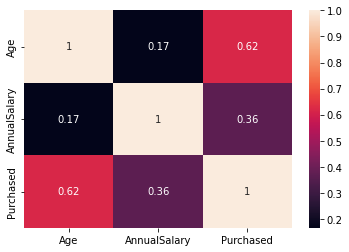

In [9]:
sns.heatmap(car_data.corr(), annot=True);

The closer the value to 1, the stronger the correlation between the variables.

In [10]:
# check for missing rows
car_data.isnull().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

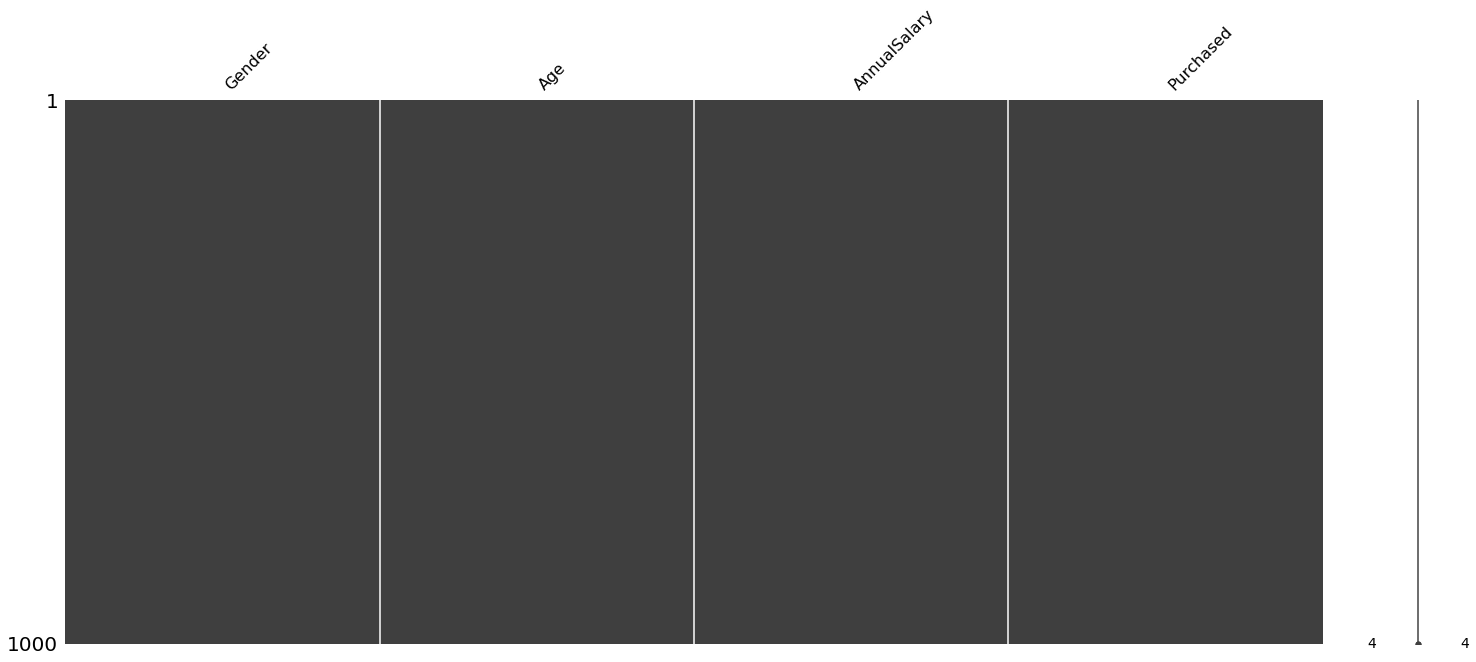

In [11]:
msno.matrix(car_data)
plt.show()

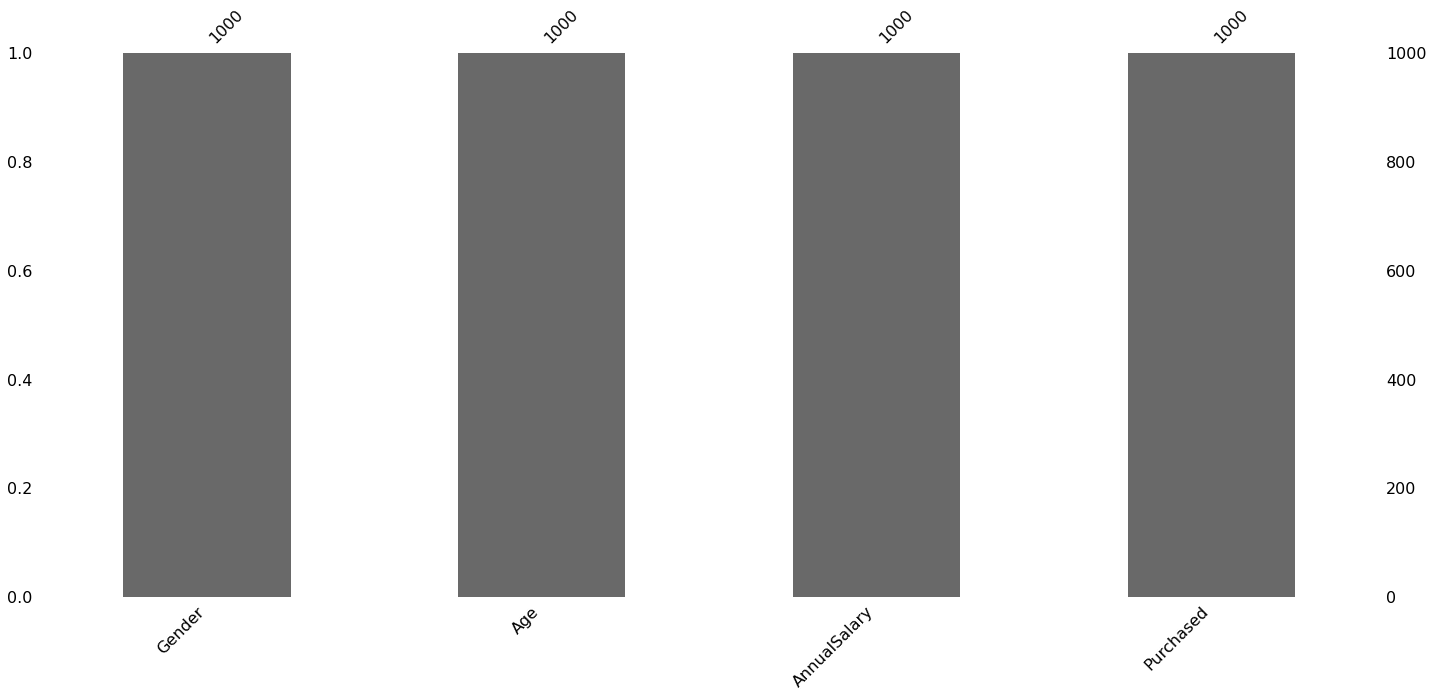

In [12]:
msno.bar(car_data)
plt.show()

The above plots showed that there is no missing values in the dataset.

## **Functions to explore each festure**

In [13]:
# function that will return value count and frequency for each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [16]:
# function to display information about the feature
def gen_info_feat(df,feature):
        match feature:
            case 'Age':
                print('Description:\n{}'.format(df[feature].describe()))
                print('*'*50)
                print('Object type:\n{}'.format(df[feature].dtype))
            case _:    
                print('Description:\n{}'.format(df[feature].describe()))
                print('*'*50)
                print('Object type:\n{}'.format(df[feature].dtype))
                print('*'*50)
                value_cnt = value_cnt_norm_cal(df,feature)
                print('Value count:\n{}'.format(value_cnt))

In [17]:
# function to create a pie chart plot
def create_pie_plot(df, feature):
    ratio_size = value_cnt_norm_cal(df, feature)
    ratio_size_len = len(ratio_size.index)
    ratio_list = []
    for i in range(ratio_size_len):
        ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
    fig, ax = plt.subplots(figsize=(8,8))
    # %1.2f%% display decimals in the pie chart with 2 decimal places
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
    plt.title('Pie chart of {}'.format(feature), fontsize=20)
    plt.legend(loc='best')
    plt.axis('equal')
    return plt.show()

In [18]:
# function to create a bar chart plot 
def create_bar_plot(df, feature):
    fig, ax  = plt.subplots(figsize=(6,10))
    sns.set_theme(style='whitegrid')
    sns.barplot(x=value_cnt_norm_cal(df, feature).index, y=value_cnt_norm_cal(df,feature).values[:,0])
    plt.xlabel('{}'.format(feature))
    plt.ylabel('Count')
    plt.title('{} count'.format(feature), fontsize=20)
    return plt.show()

In [19]:
# create to create a box plot
def create_box_plot(df, feature):
    fig, ax = plt.subplots(figsize=(2,8))
    sns.set_theme(style='whitegrid')
    sns.boxplot(y=df[feature])
    plt.title('{} distribution(Boxplot)'.format(feature), fontsize=20)
    return plt.show()

In [20]:
# function to create a histogram plot
def create_hist_plot(df, feature, the_bins=50):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.set_theme(style='whitegrid')
    sns.histplot(df[feature], bins=the_bins, kde=True)
    plt.title('{} distribution'.format(feature), fontsize=20)
    return plt.show()

In [21]:
# purchase vs non_purchase individuals compared on a box plot
def purchase_nonpurchase_box_plot(df, feature):
    print(df.groupby('Purchased')[feature].mean())
    fig, ax = plt.subplots(figsize=(5,8))
    sns.set_theme(style='whitegrid')
    sns.boxplot(y=df[feature], x=df['Purchased'])
    plt.xticks(ticks=[0,1], labels=['no', 'yes'])
    plt.title('Purchase individuals grouped by {}'.format(feature), fontsize=20)
    return plt.show()

In [22]:
# purchase vs non_purchase individuals compared on a bar plot
def purchase_nonpurchase_bar_plot(df, feature):
    purchase_grp = df.groupby(feature)['Purchased'].sum()
    purchase_grp_srt = purchase_grp.sort_values(ascending=False)
    print(dict(purchase_grp_srt))
    fig, ax = plt.subplots(figsize=(6,10))
    sns.set_theme(style='whitegrid')
    sms.barplot(x=purchase_grp_srt.index, y=purchase_grp_srt.values)
    ax.set_xticklabels(labels=purchase_grp_srt.index, rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('Purchase individuals count grouped by {}'.format(feature), fontsize=20)
    return plt.show()

## **Univariate Analysis**

### **Gender**

In [ ]:
gen_info_feat(car_data, 'Gender')

In [ ]:
create_pie_plot(car_data, 'Gender')

In [ ]:
create_bar_plot(car_data, 'Gender')

### **Age**

In [ ]:
gen_info_feat(car_data, 'Age')